# 📊 Employee Performance Analysis Report
- Prepared by: PolyTech [Capilitan, Niones, Raquem, Victorio, Villarta]
- Course and Section: BSIT 2-1 [CLuster 1: PolyTech]  
- Objective: To uncover insights in employee performance using real-world HR data.
- Date: July 2025

This report explores how age, experience, education, and department 
relate to employee performance.
Findings will guide HR in training, hiring, and promotion decisions.


## About the Original Dataset
- This dataset shows information about employee performance. It's useful for tasks like grouping people with similar traits or guessing how well someone might perform based on their details. It includes important info like age, work experience, education, department, and a score that shows how well the person is doing at work. There’s also a label that puts their performance into one of five levels: Poor, Average, Good, Very Good, or Excellent.

- Column Descriptions:
    - age: How old the employee is (between 20 and 60 years old).
    - years_experience: How many years the employee has been working (1 to 40 years).
    - education_level: The highest level of school the employee finished (High School, Bachelor’s, Master’s, or PhD).
    - group_department: The department where the employee works (like Sales, Tech, HR, or Finance).
    - performance_score: A number from 1 to 10 showing how well the employee is doing at their job.
    - performance_category: A word that tells how good their performance is (Poor, Average, Good,   Very Good, or Excellent).

## Import Libraries

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading & Initial Exploration


In [227]:
df = pd.read_csv('employee_performance.csv')
df.head()

,age,years_experience,education_level,group_department,performancescore,performance_category
0,58,23,High School,Finance,10.0,Excellent
1,48,39,Bchelor,HR,NaN,NaN
2,34,15,High School,HR,5.0,NaN
3,40,29,PhD,HR,4.0,Average
4,40,36,PhD,Finance,2.0,Poor


## Cleaning Dataset

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   791 non-null    int64  
 1   years_experience      791 non-null    int64  
 2   education_level       791 non-null    object 
 3   group_department      791 non-null    object 
 4   performancescore      790 non-null    float64
 5   performance_category  789 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 37.2+ KB


#### Check Inconsistent Values

In [229]:
df['education_level'].unique()

array(['High School', 'Bchelor', 'PhD', "Master's", 'Master', 'Hs',
       'Bachelor'], dtype=object)

In [230]:
df['group_department'].unique()

array(['Finance', 'HR', 'Tech', 'Sales'], dtype=object)

#### Observed Issues in the Dataset

After reviewing the initial dataset structure and unique values, we identified the following issues:

---

##### 1. Missing Values in Key Columns
| Column                | Non-Null Count | Expected | Issue                          |
|-----------------------|----------------|----------|--------------------------------|
| `performance_score`   | 790            | 791      | 1 missing value                |
| `performance_category`| 789            | 791      | 2 missing value                |

- These columns are critical for performance analysis and cannot be left null.

---

##### 2. Inconsistent `education_level` Values

| Raw Value   | Issue Description                      |
|-------------|----------------------------------------|
| `Bchelor`   | Typo of "Bachelor"                     |
| `"Master's"`| Contains apostrophe, non-standard      |
| `Hs`        | Abbreviation for "High School"         |
| Mixed casing| Some entries are not properly capitalized |

```python

#### Rename Columns

In [231]:
df.rename(columns={
    'group_department': 'department',
    'performancescore': 'performance_score'
}, inplace=True)

print(df.columns)

Index(['age', 'years_experience', 'education_level', 'department',
       'performance_score', 'performance_category'],
      dtype='object')


#####  Clean education_level

In [232]:
df['education_level'] = df['education_level'].str.strip()

edu_map = {
    'Bchelor': 'Bachelor',     
    "Master's": 'Master',      
    'Hs': 'High School'        
}

df['education_level'] = df['education_level'].replace(edu_map)
print(df['education_level'].unique())

['High School' 'Bachelor' 'PhD' 'Master']


##### Handle Missing Values

 Drop rows with both critical values missing:

In [233]:
df.dropna(subset=['performance_score', 'performance_category'], how='all', inplace=True)

Fill missing performance_category based on score logic:

In [234]:
def categorize(score):
    if score <= 2:
        return 'Poor'
    elif score <= 4:
        return 'Average'
    elif score <= 6:
        return 'Good'
    elif score <= 8:
        return 'Very Good'
    else:
        return 'Excellent'

df['performance_category'] = df['performance_category'].fillna(
    df['performance_score'].apply(categorize)
)

### Check for Cleaned Data

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 790
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   790 non-null    int64  
 1   years_experience      790 non-null    int64  
 2   education_level       790 non-null    object 
 3   department            790 non-null    object 
 4   performance_score     790 non-null    float64
 5   performance_category  790 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.2+ KB


## Export the cleaned dataset to a CSV file for further analysis or sharing:

In [236]:
df.to_csv('cleaned_employee_performance.csv', index=False)

## Add Columns for Data Visualizations

#### Read the cleaned dataset

In [237]:
df = pd.read_csv('cleaned_employee_performance.csv')
df.head()

,age,years_experience,education_level,department,performance_score,performance_category
0,58,23,High School,Finance,10.0,Excellent
1,34,15,High School,HR,5.0,Good
2,40,29,PhD,HR,4.0,Average
3,40,36,PhD,Finance,2.0,Poor
4,58,13,PhD,Tech,4.0,Average


In [238]:
df['annual_performance'] = df['performance_score'] / df['years_experience'].replace(0, 1)
df['annual_performance'].unique()

array([ 0.43478261,  0.33333333,  0.13793103,  0.05555556,  0.30769231,
        0.3125    ,  1.42857143,  0.13636364,  0.35714286,  0.5       ,
        1.33333333,  0.17857143,  0.14285714,  0.4       ,  0.23333333,
        0.18181818,  0.03571429,  0.16      ,  0.20512821,  0.06060606,
        3.        ,  0.03703704,  0.07692308,  1.        ,  0.12820513,
        0.125     ,  0.88888889,  0.27027027,  0.13333333,  0.09375   ,
        0.21875   ,  0.04166667,  0.83333333,  5.        ,  3.33333333,
        0.11764706,  1.5       ,  4.5       ,  0.25      ,  0.17391304,
        0.15625   ,  8.        ,  0.21052632,  0.19230769,  0.28125   ,
        0.66666667,  1.25      ,  0.81818182,  0.47058824,  0.07894737,
        0.6       ,  0.04545455,  0.63636364,  0.21212121,  0.55555556,
        0.16666667,  0.4375    ,  0.24137931,  0.15      ,  0.05263158,
        0.03846154,  0.47368421,  0.3       ,  0.12121212,  0.23076923,
        9.        ,  0.12      ,  0.16129032,  0.08571429,  1.28

### Performance Level

In [239]:
df['performance_level'] = df['performance_category'].map({
    'Poor': 'Low', 'Average': 'Low',
    'Good': 'Medium', 'Very Good': 'High', 'Excellent': 'High'
})
df['performance_level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

### Age Group

In [240]:
df['age_group'] = pd.cut(df['age'], bins=[0, 29, 45, 100],
                         labels=['Young', 'Mid-Career', 'Senior'])
df['age_group'].unique()

['Senior', 'Mid-Career', 'Young']
Categories (3, object): ['Young' < 'Mid-Career' < 'Senior']

### Experience Group

In [241]:
df['experience_band'] = pd.cut(df['years_experience'],
                               bins=[0, 5, 10, 20, 40],
                               labels=['Entry', 'Junior', 'Mid', 'Senior'])
df['experience_band'].unique()

['Senior', 'Mid', 'Junior', 'Entry']
Categories (4, object): ['Entry' < 'Junior' < 'Mid' < 'Senior']

## Export the updated dataset with new columns:

In [242]:
df.to_csv('final_employee_performance.csv', index=False)

## Data Visualizations (Scatter, Bar, Line, Histogram)

#### Read the the manipulated dataset


In [243]:
df = pd.read_csv('final_employee_performance.csv')
df.head()

,age,years_experience,education_level,department,performance_score,performance_category,annual_performance,performance_level,age_group,experience_band
0,58,23,High School,Finance,10.0,Excellent,0.434783,High,Senior,Senior
1,34,15,High School,HR,5.0,Good,0.333333,Medium,Mid-Career,Mid
2,40,29,PhD,HR,4.0,Average,0.137931,Low,Mid-Career,Senior
3,40,36,PhD,Finance,2.0,Poor,0.055556,Low,Mid-Career,Senior
4,58,13,PhD,Tech,4.0,Average,0.307692,Low,Senior,Mid


### 1. Bar Chart: Count of Employees per Performance Category 

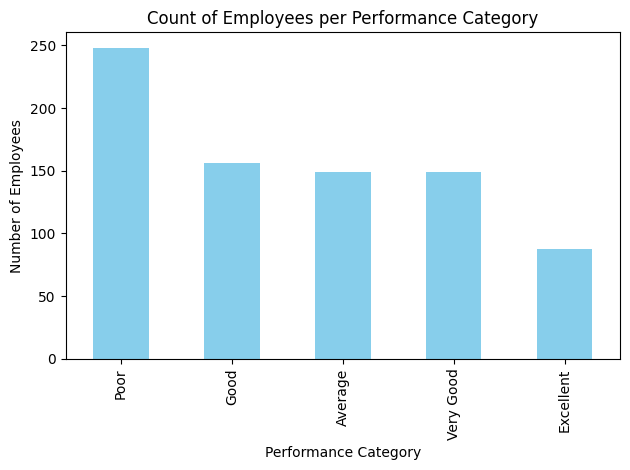

Performance Category Counts:
performance_category
Poor         248
Good         156
Average      149
Very Good    149
Excellent     88
Name: count, dtype: int64


In [253]:
df['performance_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Employees per Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

print("Performance Category Counts:")
print(df['performance_category'].value_counts())

### 2. Bar Chart: Average Performance Score by Education Level

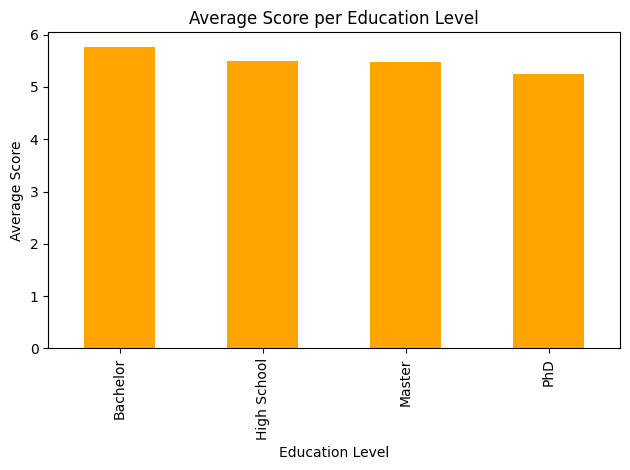


Average Performance Score by Education Level:
education_level
Bachelor       5.756219
High School    5.490566
Master         5.468750
PhD            5.243243
Name: performance_score, dtype: float64


In [245]:
edu_avg = df.groupby('education_level')['performance_score'].mean()

edu_avg.plot(kind='bar', color='orange')
plt.title('Average Score per Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

print("\nAverage Performance Score by Education Level:")
print(edu_avg)

### 3. Histogram: Distribution of Performance Scores

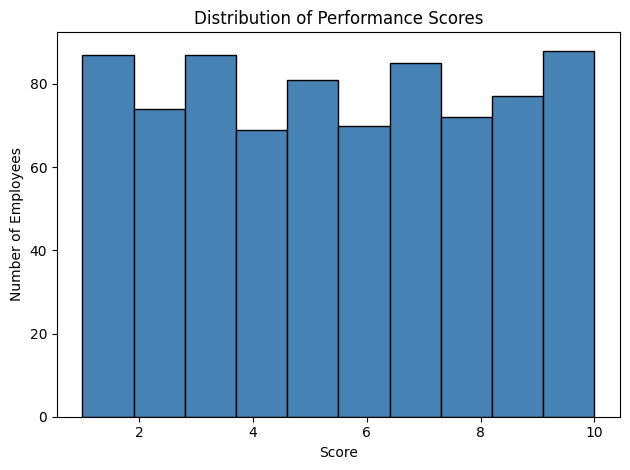


Performance Score Stats:
Min: 1.0
Max: 10.0
Mean: 5.49


In [246]:
plt.hist(df['performance_score'], bins=10, color='steelblue', edgecolor='black')
plt.title('Distribution of Performance Scores')
plt.xlabel('Score')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

print("\nPerformance Score Stats:")
print("Min:", df['performance_score'].min())
print("Max:", df['performance_score'].max())
print("Mean:", round(df['performance_score'].mean(), 2))

### 4. Scatter Plot: Experience Vs Individual Performance Improvement Rate 

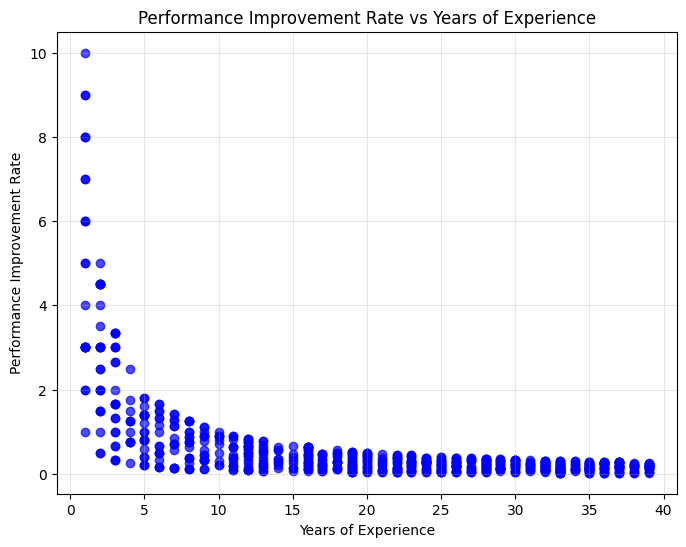

Correlation between experience and improvement rate: -0.552
Average improvement rate: 0.604
Median improvement rate: 0.257


In [247]:
plt.figure(figsize=(8, 6))
plt.scatter(df['years_experience'], df['annual_performance'], alpha=0.7, color='blue')
plt.title('Performance Improvement Rate vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Improvement Rate')
plt.grid(True, alpha=0.3)
plt.show()

correlation = df['years_experience'].corr(df['annual_performance'])
print(f"Correlation between experience and improvement rate: {correlation:.3f}")

print(f"Average improvement rate: {df['annual_performance'].mean():.3f}")
print(f"Median improvement rate: {df['annual_performance'].median():.3f}")

### 5. Bar Chart: Count of Employees per Age Group

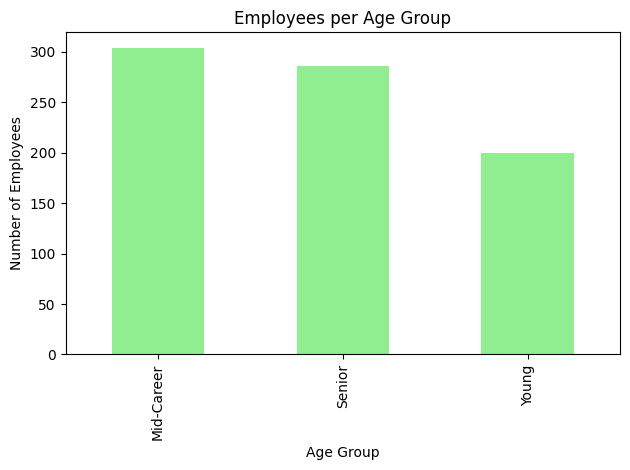


Age Group Counts:
age_group
Mid-Career    304
Senior        286
Young         200
Name: count, dtype: int64


In [248]:
df['age_group'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Employees per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

print("\nAge Group Counts:")
print(df['age_group'].value_counts())

### 6. Line Plot: Average Overall Performance by Experience Band

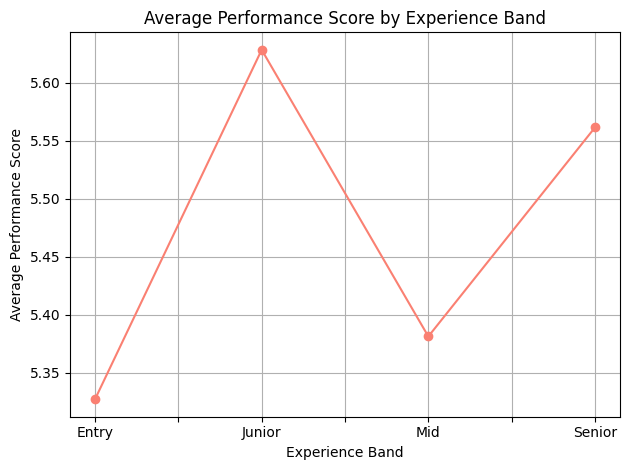


Average Performance Score by Experience Band:
experience_band
Entry     5.327103
Junior    5.628205
Mid       5.381215
Senior    5.561321
Name: performance_score, dtype: float64


In [256]:
exp_avg = df.groupby('experience_band')['performance_score'].mean()

exp_avg.plot(kind='line', marker='o', color='salmon')
plt.title('Average Performance Score by Experience Band')
plt.xlabel('Experience Band')
plt.ylabel('Average Performance Score')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nAverage Performance Score by Experience Band:")
print(exp_avg)

### 7. Bar Graph  Insight A: Department with Most High Performers

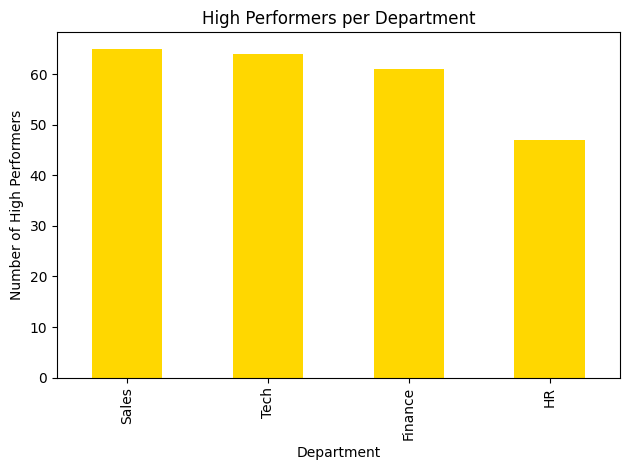


Average Score per Year by Experience Band:
experience_band
Entry     2.583956
Junior    0.731181
Mid       0.355726
Senior    0.187719
Name: score_per_year, dtype: float64


In [118]:
high_performers = df[df['performance_category'].isin(['Excellent', 'Very Good'])]
high_counts = high_performers['department'].value_counts()

high_counts.plot(kind='bar', color='gold')
plt.title('High Performers per Department')
plt.xlabel('Department')
plt.ylabel('Number of High Performers')
plt.tight_layout()
plt.show()

print("\nAverage Score per Year by Experience Band:")
print(exp_avg)